# Лабораторная 2. Бинаризация и квантование

Загрузка изображения и преобразование цветного к полутоновому

Квантование по яркости (с ручным заданием количества уровней)

Бинаризация
    Бинаризация методом Оцу глобальная
    Бинаризация методом Оцу локальная (с предварительным разбиением на фрагменты - по каждому своя бинаризация)
    Бинаризация методом Оцу иерархическая (выполняется с иерархическим разбиением каждой уже полученной  области, пока возможно разбивать). Квантование с использованием найденных порогов

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import io 
from PIL import Image
import numpy as np
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Загрузка фото

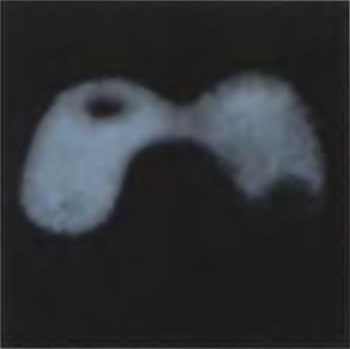

In [2]:
#"\\Users\\InColumi\\Desktop\\University\\Computer Vision\\Photo\\Квантование по яркости\\1.png"
def openImage(path):
    return Image.open(path)
imageColor = openImage("\\Users\\InColumi\\Desktop\\University\\Computer Vision\\Photo\\Квантование по яркости\\1.png")
imageColor

In [3]:
width = imageColor.size[0]
height = imageColor.size[1]
size = width * height
print("Width: ", width, "Height: ", height,"Size: ", size)

Width:  350 Height:  349 Size:  122150


# Преобразование цветного к полутоновому

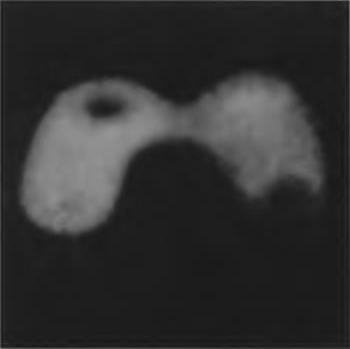

In [4]:
def getGrayImage(image):
    pixels = image.load()
    width = image.size[0]
    height = image.size[1]
    for i in range(width):
        for j in range(height):
                S = round(sum(pixels[i,j]) / 3)
                pixels[i, j] = S, S, S
    return image
grayImage = getGrayImage(imageColor)
grayImage

# Построение гистограммы

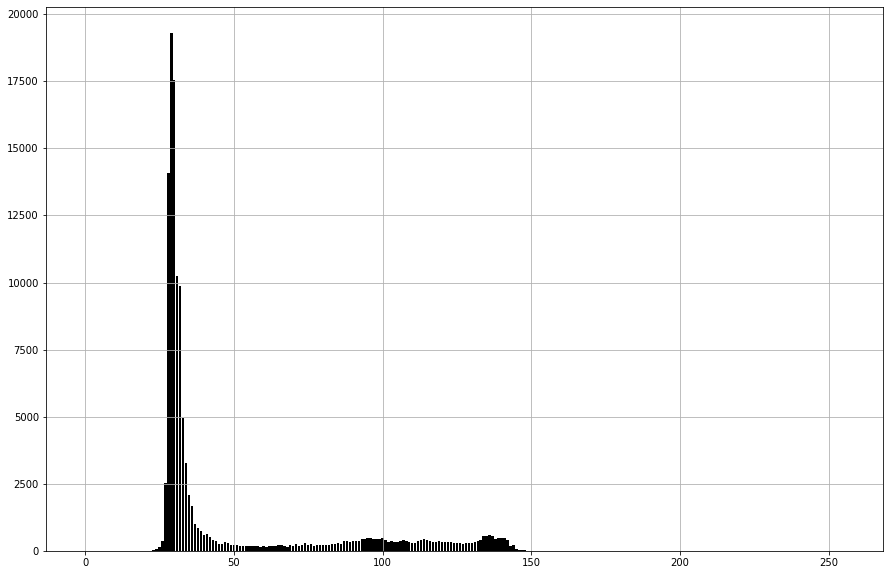

In [5]:
def getCountGrayColors(image):
    rgb = list(0 for i in range(0, 256,1))
    width = image.size[0]
    height = image.size[1]
    pixels = image.load()
    for i in range(width):
        for j in range(height):
            rgb[pixels[i, j][0]] += 1
    return rgb

def showHist(colors):
    lenColors = len(colors)
    plt.figure(figsize=(15, 10))
    plt.bar([i for i in range(0, 256)], colors, color="black")
    plt.grid()
    
    plt.show()

showHist(getCountGrayColors(grayImage))

# Квантование по яркости (с ручным заданием количества уровней)

In [6]:
import copy
def getQuantizationImage(image, quantizationThreshold):
    result = copy.deepcopy(image)
    width = result.size[0]
    height = result.size[1]
    
    pixels = result.load()
    countOldColors = 256
    
    partitionColors = quantizationThreshold
    factorColor = countOldColors / partitionColors
    palette = [round(i * factorColor) for i in range(0, partitionColors)]
    #print(palette)
    for i in range(width):
        for j in range(height):
            for k in range(1, partitionColors):
                if palette[k - 1] < pixels[i, j][0] < palette[k]:
                    color = round((palette[k - 1] + palette[k]) / 2)
                    pixels[i, j] = color, color, color
                    break
                    #pixels[i, j] = color
    return result

@interact_manual(step=(1, 256, 1))
def Quantization(step):
    quantizationImage = getQuantizationImage(grayImage, step)
    display(quantizationImage)
    showHist(getCountGrayColors(quantizationImage))
    print(step)

interactive(children=(IntSlider(value=128, description='step', max=256, min=1), Button(description='Run Intera…

# Бинаризация

# Бинаризация методом Оцу глобальная

In [14]:
import numpy as np
def getGrayPixels(image):
    width = image.size[0]
    height = image.size[1]
    size = width * height
    result = [0 for i in range(0, size)]
    pixels = image.load()
    indexResult = 0
    for i in range(width):
        for j in range(height):
                result[indexResult] = pixels[i,j][0]
                indexResult += 1
    return result

def getThresholdByOtsuBinatization(grayPixels, sizeImage): 
    maxSigma = 0
    maxThreshold = 0
    
    for i in range(1, 256):
        v0 = [grayPixels[j] for j in grayPixels if grayPixels[j] < i]
        #v0 = grayPixels[np.where(grayPixels < i)]
        m0 = np.mean(v0) if len(v0) > 0 else 0.
        w0 = len(v0) / sizeImage
        
        v1 = [grayPixels[j] for j in grayPixels if grayPixels[j] >= i]
        m1 = np.mean(v1) if len(v1) > 0 else 0.
        w1 = len(v1) / sizeImage
        
        sigma = w0 * w1 * ((m0 - m1) ** 2)
        
        if sigma > maxSigma:
            maxSigma = sigma
            maxThreshold = i

    return maxThreshold

def getImageByOtsuBinatization(image, threshold):
    result = copy.deepcopy(image)
    width = result.size[0]
    height = result.size[1]
    pixels = result.load()
    for i in range(width):
        for j in range(height):
            color = 0 if pixels[i,j][0] < threshold else 255
            pixels[i,j] = color, color,color
                
    return result

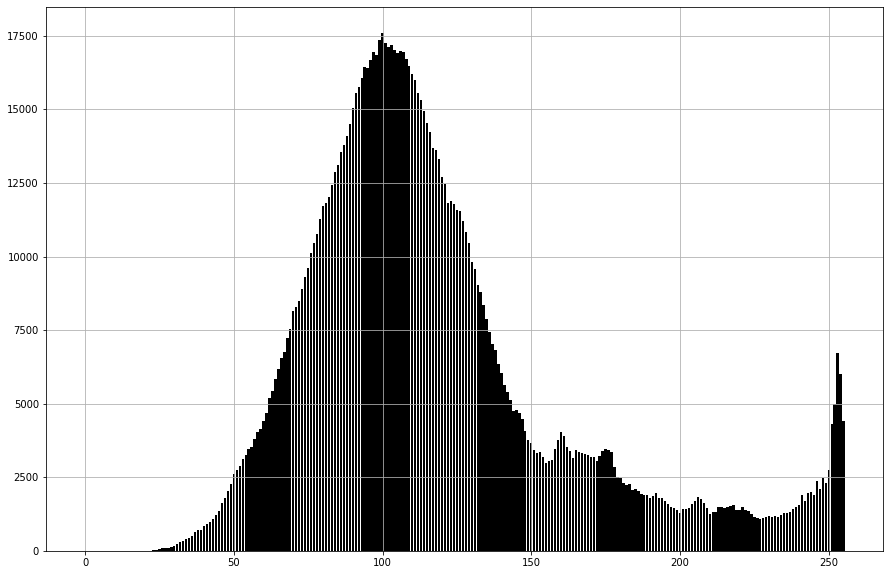

In [15]:
image = openImage("\\Users\\InColumi\\Desktop\\University\\Computer Vision\\Photo\\1.jpg")

grayImage = getGrayImage(image)

showHist(getCountGrayColors(grayImage))

In [16]:
thresholdByOtsuBinatization = getThresholdByOtsuBinatization(getGrayPixels(grayImage), size)

print("Threshold By Otsu Binatization:", thresholdByOtsuBinatization)

Threshold By Otsu Binatization: 122


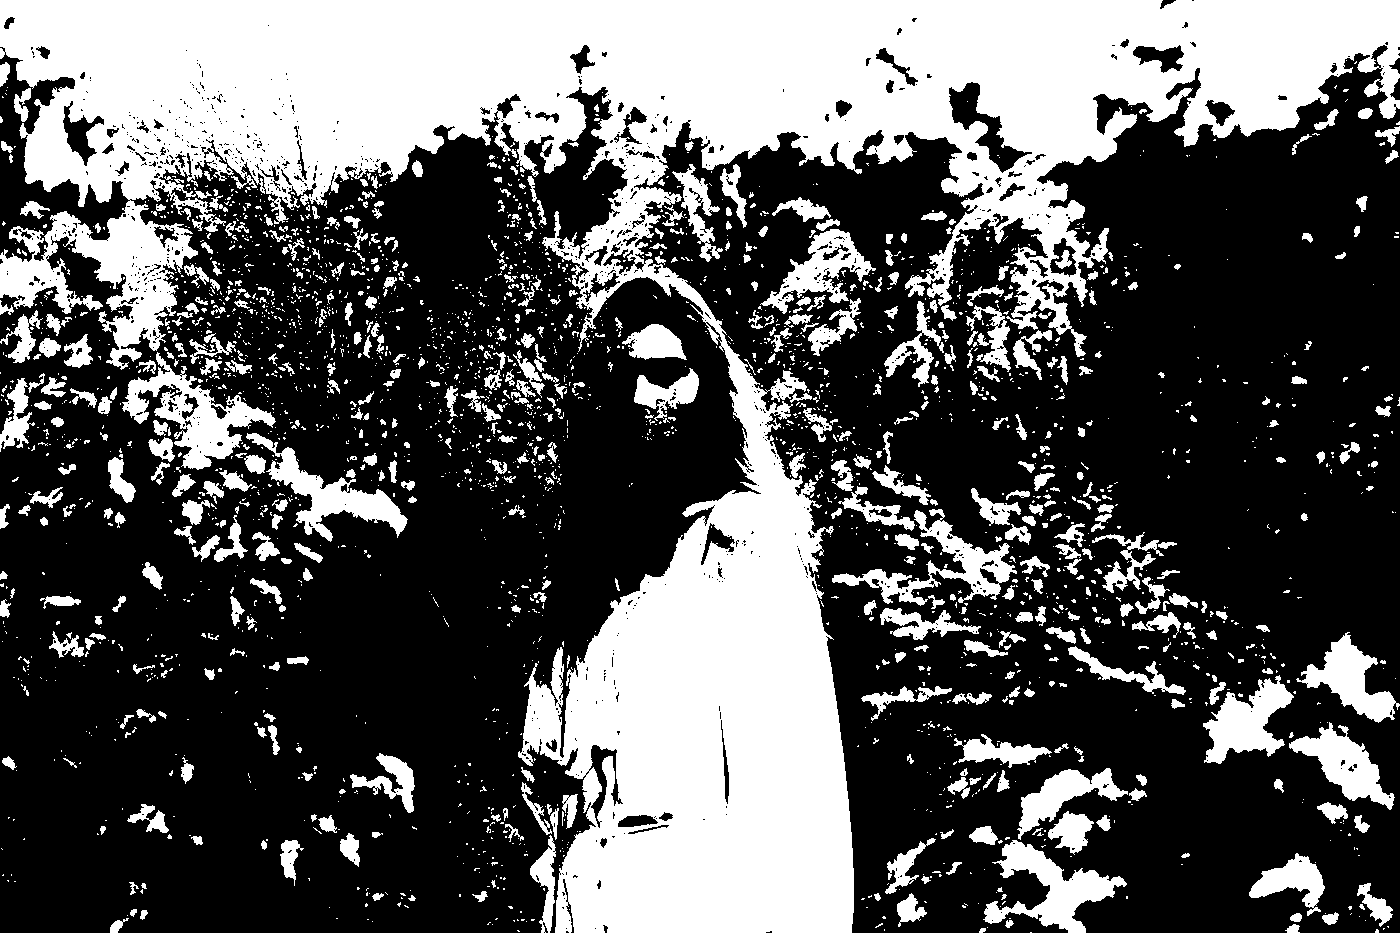

In [22]:
imageByOtsuBinatization = getImageByOtsuBinatization(grayImage, thresholdByOtsuBinatization)
imageByOtsuBinatization